# Деление выборки

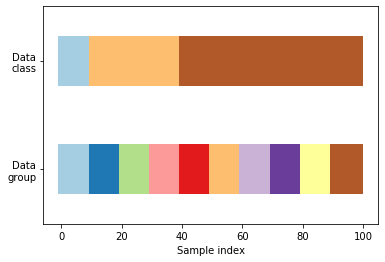

In [1]:
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4
# Generate the class/group data
n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc)
               for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 10 for ii in range(10)])


def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)),  [.5] * len(groups), c=groups, marker='_',
               lw=50, cmap=cmap_data)
    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=classes, marker='_',
               lw=50, cmap=cmap_data)
    ax.set(ylim=[-1, 5], yticks=[.5, 3.5],
           yticklabels=['Data\ngroup', 'Data\nclass'], xlabel="Sample index")


visualize_groups(y, groups, 'no groups')

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

## кросс-валидация KFold

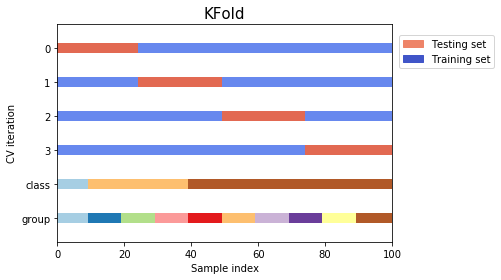

In [2]:
fig, ax = plt.subplots()
cv = KFold(n_splits)
ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
plot_cv_indices(cv, X, y, groups, ax, n_splits);

In [3]:
import numpy as np
from sklearn.model_selection import KFold

Xt = range(10)
kf = KFold(n_splits=3)
for train, test in kf.split(Xt):
    print("%s %s" % (train, test))

[4 5 6 7 8 9] [0 1 2 3]
[0 1 2 3 7 8 9] [4 5 6]
[0 1 2 3 4 5 6] [7 8 9]


In [4]:
Xt = range(10)
kf = KFold(n_splits=3)
for train, test in kf.split(Xt):
    print("%s %s" % (train, test))

[4 5 6 7 8 9] [0 1 2 3]
[0 1 2 3 7 8 9] [4 5 6]
[0 1 2 3 4 5 6] [7 8 9]


In [5]:
from sklearn.model_selection import RepeatedKFold
Xt = range(10)
rkf = RepeatedKFold(n_splits=3, n_repeats=2) # Внимание! random_state не использовать !!!
for train, test in rkf.split(Xt):
    print("%s %s" % (train, test))

[0 3 5 7 8 9] [1 2 4 6]
[1 2 3 4 5 6 7] [0 8 9]
[0 1 2 4 6 8 9] [3 5 7]
[0 1 4 7 8 9] [2 3 5 6]
[2 3 5 6 7 8 9] [0 1 4]
[0 1 2 3 4 5 6] [7 8 9]


In [6]:
from sklearn.model_selection import LeaveOneOut
Xt = range(5)
loo = LeaveOneOut()
for train, test in loo.split(Xt):
    print("%s %s" % (train, test))

[1 2 3 4] [0]
[0 2 3 4] [1]
[0 1 3 4] [2]
[0 1 2 4] [3]
[0 1 2 3] [4]


In [7]:
from sklearn.model_selection import LeavePOut
Xt = range(5)
loo = LeavePOut(p=2) # число сочетаний
for train, test in loo.split(Xt):
    print("%s %s" % (train, test))

[2 3 4] [0 1]
[1 3 4] [0 2]
[1 2 4] [0 3]
[1 2 3] [0 4]
[0 3 4] [1 2]
[0 2 4] [1 3]
[0 2 3] [1 4]
[0 1 4] [2 3]
[0 1 3] [2 4]
[0 1 2] [3 4]


## кросс-валидация StratifiedKFold

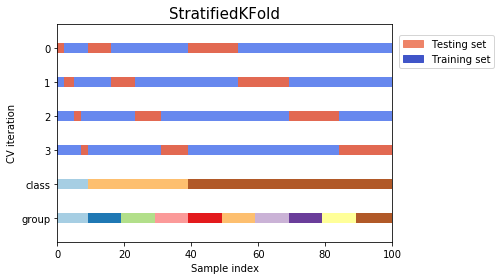

In [8]:
fig, ax = plt.subplots()
cv = StratifiedKFold(n_splits)
ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
plot_cv_indices(cv, X, y, groups, ax, n_splits);

In [9]:
Xt, yt = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))
skf = StratifiedKFold(n_splits=3)
print('в скобках: [класс 0   класс 1]')
for train, test in skf.split(Xt, yt):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(yt[train]), np.bincount(yt[test])))


в скобках: [класс 0   класс 1]
train -  [30  3]   |   test -  [15  2]
train -  [30  3]   |   test -  [15  2]
train -  [30  4]   |   test -  [15  1]


## кросс-валидация ShuffleSplit

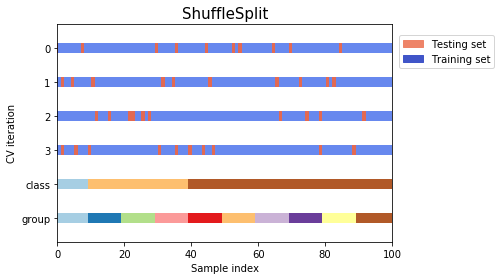

In [10]:
fig, ax = plt.subplots()
cv = ShuffleSplit(n_splits)
ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
plot_cv_indices(cv, X, y, groups, ax, n_splits);

In [11]:
Xt, yt = np.ones((50, 1)), np.hstack(([0] * 35, [1] * 15))
rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
print('в скобках: [класс 0   класс 1]')
for train, test in rs.split(Xt, yt):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(yt[train]), np.bincount(yt[test])))
    
    

в скобках: [класс 0   класс 1]
train -  [25 12]   |   test -  [10  3]
train -  [25 12]   |   test -  [10  3]
train -  [26 11]   |   test -  [9 4]
train -  [25 12]   |   test -  [10  3]
train -  [27 10]   |   test -  [8 5]


## кросс-валидация StratifiedShuffleSplit

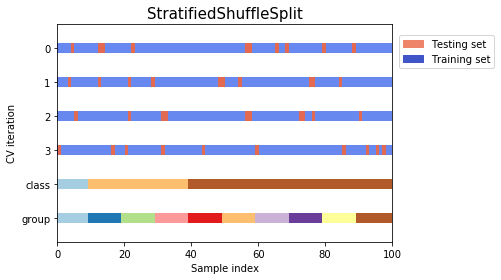

In [12]:
fig, ax = plt.subplots()
cv = StratifiedShuffleSplit(n_splits)
ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
plot_cv_indices(cv, X, y, groups, ax, n_splits);

In [13]:
Xt, yt = np.ones((50, 1)), np.hstack(([0] * 35, [1] * 15))
rs = StratifiedShuffleSplit(n_splits=5, test_size=.25, random_state=0)
print('в скобках: [класс 0   класс 1]')
for train, test in rs.split(Xt, yt):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(yt[train]), np.bincount(yt[test])))

в скобках: [класс 0   класс 1]
train -  [26 11]   |   test -  [9 4]
train -  [26 11]   |   test -  [9 4]
train -  [26 11]   |   test -  [9 4]
train -  [26 11]   |   test -  [9 4]
train -  [26 11]   |   test -  [9 4]


## кросс-валидация TimeSeriesSplit

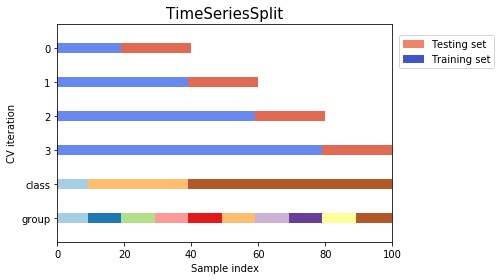

In [14]:
fig, ax = plt.subplots()
cv = TimeSeriesSplit(n_splits)
ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
plot_cv_indices(cv, X, y, groups, ax, n_splits);

In [15]:
from sklearn.model_selection import TimeSeriesSplit
Xt = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
yt = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=5)
print(tscv)

for train_index, test_index in tscv.split(Xt):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = Xt[train_index], Xt[test_index]
    y_train, y_test = yt[train_index], yt[test_index]

TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


In [16]:
from sklearn.model_selection import TimeSeriesSplit
Xt = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
yt = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(max_train_size=3,n_splits=3)
print(tscv)

for train_index, test_index in tscv.split(Xt):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = Xt[train_index], Xt[test_index]
    y_train, y_test = yt[train_index], yt[test_index]

TimeSeriesSplit(max_train_size=3, n_splits=3)
TRAIN: [0 1 2] TEST: [3]
TRAIN: [1 2 3] TEST: [4]
TRAIN: [2 3 4] TEST: [5]


## кросс-валидация GroupKFold

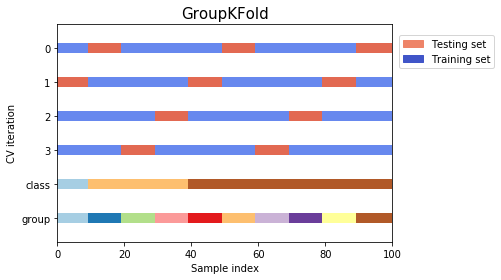

In [17]:
fig, ax = plt.subplots()
cv = GroupKFold(n_splits)
ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
plot_cv_indices(cv, X, y, groups, ax, n_splits);

In [18]:
Xt = np.array([10, 20, 30, 40, 50, 60])
yt = np.array([1, 2, 3, 4, 5, 6])
groupst = np.array([0, 0, 0, 2, 2, 2])
group_kfold = GroupKFold(n_splits=2)
group_kfold.get_n_splits(Xt, yt, groupst)

print(group_kfold)

for train_index, test_index in group_kfold.split(Xt, yt, groupst):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = Xt[train_index], Xt[test_index]
    y_train, y_test = yt[train_index], yt[test_index]
    print(X_train, X_test, y_train, y_test)

GroupKFold(n_splits=2)
TRAIN: [0 1 2] TEST: [3 4 5]
[10 20 30] [40 50 60] [1 2 3] [4 5 6]
TRAIN: [3 4 5] TEST: [0 1 2]
[40 50 60] [10 20 30] [4 5 6] [1 2 3]


In [19]:
Xt = np.array([10, 20, 30, 40, 50, 60])
yt = np.array([1, 2, 3, 4, 5, 6])
groupst = np.array([0, 0, 1, 1, 2, 2])
group_kfold = GroupKFold(n_splits=3)
group_kfold.get_n_splits(Xt, yt, groupst)

print(group_kfold)

for train_index, test_index in group_kfold.split(Xt, yt, groupst):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = Xt[train_index], Xt[test_index]
    y_train, y_test = yt[train_index], yt[test_index]
    print(X_train, X_test, y_train, y_test)

GroupKFold(n_splits=3)
TRAIN: [0 1 2 3] TEST: [4 5]
[10 20 30 40] [50 60] [1 2 3 4] [5 6]
TRAIN: [0 1 4 5] TEST: [2 3]
[10 20 50 60] [30 40] [1 2 5 6] [3 4]
TRAIN: [2 3 4 5] TEST: [0 1]
[30 40 50 60] [10 20] [3 4 5 6] [1 2]


## кросс-валидация GroupShuffleSplit

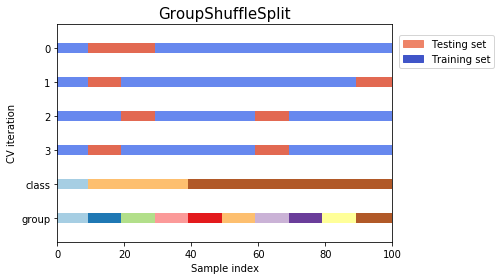

In [20]:
fig, ax = plt.subplots()
cv = GroupShuffleSplit(n_splits)
ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
plot_cv_indices(cv, X, y, groups, ax, n_splits);

In [21]:
Xt = np.array([10, 20, 30, 40, 50, 60])
yt = np.array([1, 2, 3, 4, 5, 6])
groupst = np.array([0, 0, 1, 1, 2, 2])
group_kfold = GroupShuffleSplit( n_splits=5, train_size=.7, random_state=42)
group_kfold.get_n_splits(Xt, yt, groupst)

print(group_kfold)

for train_index, test_index in group_kfold.split(Xt, yt, groupst):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = Xt[train_index], Xt[test_index]
    y_train, y_test = yt[train_index], yt[test_index]
    print(X_train, X_test, y_train, y_test)

GroupShuffleSplit(n_splits=5, random_state=42, test_size=None, train_size=0.7)
TRAIN: [2 3 4 5] TEST: [0 1]
[30 40 50 60] [10 20] [3 4 5 6] [1 2]
TRAIN: [0 1 4 5] TEST: [2 3]
[10 20 50 60] [30 40] [1 2 5 6] [3 4]
TRAIN: [2 3 4 5] TEST: [0 1]
[30 40 50 60] [10 20] [3 4 5 6] [1 2]
TRAIN: [0 1 4 5] TEST: [2 3]
[10 20 50 60] [30 40] [1 2 5 6] [3 4]
TRAIN: [2 3 4 5] TEST: [0 1]
[30 40 50 60] [10 20] [3 4 5 6] [1 2]
